<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [5]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv("./data/job_listings.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [9]:
def beauify(x):
    soup = BeautifulSoup(x)
    return soup.text
df.description = df.description.apply(beauify)

## 2) Use Spacy to tokenize the listings 

In [11]:
import en_core_web_sm
nlp = en_core_web_sm.load()
# spacy tokenizer with a slight modification to strip white space off of the lemma
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

,$,+,+ city,+ city worldwide,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,...,yes,york,york city,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,|
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.029618,0.0,0.0,0.032340,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.204567,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.146075,0.0,0.0,0.159502,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [16]:
# using spacy tokenizer to make word counts because my tfidf model uses spacy so might as
# well keep it consistant
vect = CountVectorizer(stop_words='english', max_features=1000, tokenizer=tokenize)
dtm = vect.fit_transform(df.description)
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,$,+,1,10,100,2,2019,3,4,5,...,world\xe2\x80\x99s,worldwide,write,writing,year,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll,||
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,2,0,0,0,0,0,0,0,...,0,0,2,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 4) Visualize the most common word counts

In [46]:
word_count_vects = vect.transform(df.description)

(-0.7, 1.35)

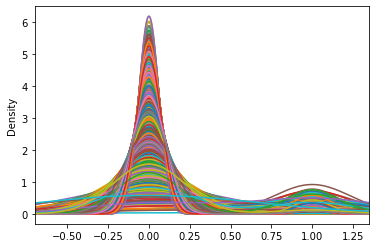

In [67]:
pd.DataFrame(word_count_vects.todense(),columns=vect.get_feature_names()).plot(kind="kde",legend=False).set_xlim([-0.7,1.35])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [25]:
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=[1,3],
                        max_df=.97,
                        min_df=5, # if a term is not included in 3 documents then exclude it 
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df.description) # Similiar to fit_predict

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,+,+ city,+ city worldwide,+ year,+ year experience,+ year hand,+ year industry,+ year professional,+ year relevant,...,yes,york,york city,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,|
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.029618,0.0,0.0,0.032340,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.204567,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.146075,0.0,0.0,0.159502,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [26]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [43]:
ideal_job = """building machine learning models, deploying to production servers, engineering systems architecture, exploring the relationships in the data, sql, posgresql, remote
"""
ideal_job_tr = tfidf.transform([ideal_job])
results = nn.kneighbors(ideal_job_tr.todense())

In [44]:
certs = results[0].tolist()[0]
jobs = results[1].tolist()[0]
for cert,job in zip(certs,jobs):
    print(f"JOB: \n{df.iloc[job]}\n\tCERTIAN: {cert}")

JOB: 
description    b'We are hiring a remote Data Scientist with s...
title                              REMOTE Data Scientist Opening
Name: 173, dtype: object
	CERTIAN: 1.2741801205274108
JOB: 
description    b'Job description:\n Data Scientist positions ...
title                                             Data Scientist
Name: 126, dtype: object
	CERTIAN: 1.3175990567528997
JOB: 
description    b'Job description:\n Data Scientist positions ...
title                                             Data Scientist
Name: 174, dtype: object
	CERTIAN: 1.3175990567528997
JOB: 
description    b'Motiion is a technology and data company for...
title                                  Data Scientist - [Remote]
Name: 23, dtype: object
	CERTIAN: 1.322929365655628
JOB: 
description    b'Motiion is a technology and data company for...
title                                  Data Scientist - [Remote]
Name: 123, dtype: object
	CERTIAN: 1.322929365655628


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 